# Gitcoin Dynamical Network generation

03dec2020

---

On this notebook, we use a cadCAD model for retrieving the first 2000 contribution events from Gitcoin Grants Round 7. We generate a dynamical network where we have a NetworkX Digraph for each sequential point. 

We also calculate the CLR match and the theoretical match (match before normalization) for each point on time. We perform a A/B test in regards to the presence of the user pairwise comparison term.



## Dependences & parameters

In [1]:
%load_ext autotime

In [2]:
from src.model import *
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px

time: 7.59 s


## Execute simulation

In [3]:

from cadCAD import configs

result = run(configs)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (2000, 5, 1, 12)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 272.57s
time: 4min 34s


## Data analysis



In [4]:
df = result.loc[(0, 0, 1, slice(None))]


time: 20.1 ms


In [5]:
### Quadratic Funding with Pairwise term

time: 1.66 ms


In [6]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['quadratic_total_match', 'quadratic_total_funding'])

fig.show()

time: 1.29 s


In [16]:
y = df.quadratic_total_funding / df.quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match')

time: 133 ms


### Quadratic Funding without Pairwise term

In [14]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['simple_quadratic_total_match', 'simple_quadratic_total_funding'])
fig.show()

time: 396 ms


In [15]:
y = df.simple_quadratic_total_funding / df.simple_quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match')

time: 588 ms


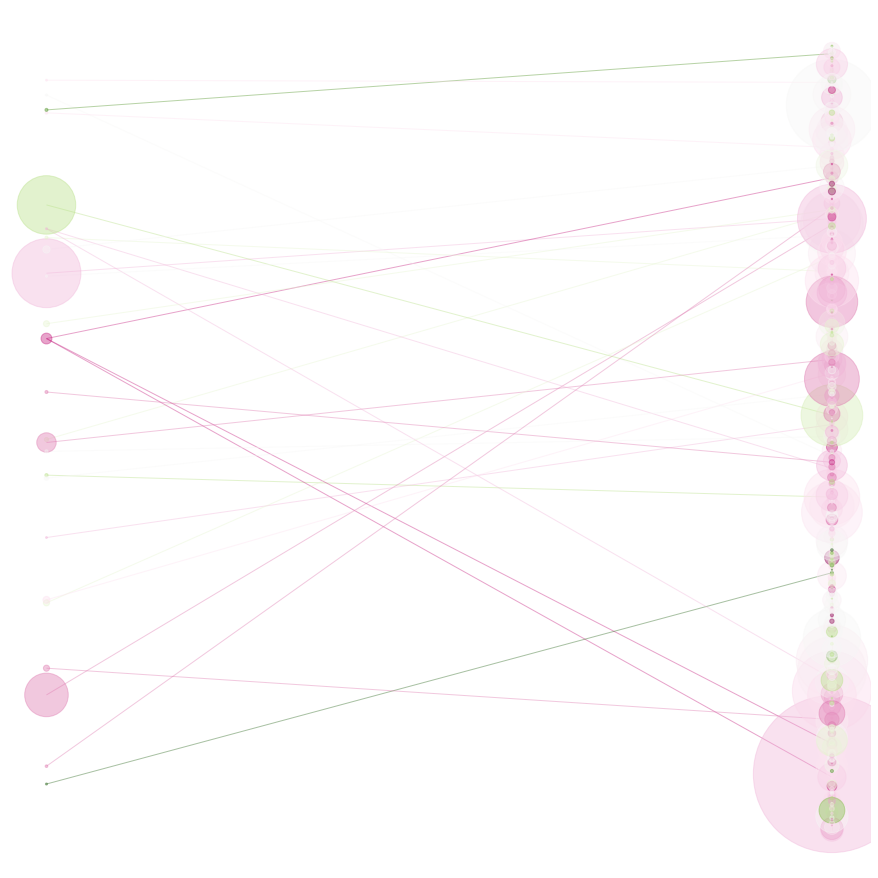

time: 3.82 s


In [10]:
from src.utils import plot_contributions
c = df.contributions.iloc[-1]
plot_contributions(c)
plt.show()


In [11]:
# from src.utils import create_video_snap

# create_video_snap(df.contributions.iloc[1:])


time: 1.53 ms
